# Семинар 15. Pandas_3

        
Анализ датасета: [Seattle Fremont Bridge Bike Counter](http://www.seattle.gov/transportation/projects-and-programs/programs/bike-program/bike-counters/fremont-bike-counters)

## Pandas Cheat Sheet

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задание

- Отыскать ссылки для загрузки данных и ассоциировать с ними имена `url...`
- Выяснить, в каком формате выдаются данные
- Загрузить данные при помощи `pandas`

In [1]:
url0 = 'https://www.eco-visio.net/api/aladdin/1.0.0/pbl/publicwebpage/data/101020981?begin=20121008&end=20211026&step=3&domain=854&t=db8a1988058bc5cc112ab52690b32e2763fa6840993e570e937f41d4c454db10&withNull=true'
url1 = 'https://www.eco-visio.net/api/aladdin/1.0.0/pbl/publicwebpage/data/102020981?begin=20121008&end=20211026&step=3&domain=854&t=db8a1988058bc5cc112ab52690b32e2763fa6840993e570e937f41d4c454db10&withNull=true'

In [4]:
df0 = pd.read_json(url0)
df1 = pd.read_json(url1)

In [5]:
df0.to_json('data0.json')
df1.to_json('data1.json')

## Задание

Изучить данные
- количество и типы столбцов
- количество записей
- что означают столбцы?

In [7]:
df0.dtypes

date         datetime64[ns]
comptage              int64
timestamp    datetime64[ns]
dtype: object

## Задание

- Преобразовать строки в формат `datetime`
- Выбросить лишние столбцы
- Объединить в одну таблицу

In [10]:
np.all(df0['date'] == df1.date), np.all(df0['date'] == df0.timestamp)

(True, True)

In [16]:
df = df0.drop(columns='timestamp').merge(df1.drop(columns='timestamp'), on='date')
df.head()

,date,comptage_x,comptage_y
0,2012-10-08 00:00:00,4,5
1,2012-10-08 01:00:00,2,2
2,2012-10-08 02:00:00,5,0
3,2012-10-08 03:00:00,1,4
4,2012-10-08 04:00:00,3,2


In [18]:
df.set_index('date', inplace=True)
df.columns = ['east', 'west']
df.head()

,east,west
date,,
2012-10-08 00:00:00,4,5
2012-10-08 01:00:00,2,2
2012-10-08 02:00:00,5,0
2012-10-08 03:00:00,1,4
2012-10-08 04:00:00,3,2


In [19]:
df['total'] = df.east + df.west
df.head()

,east,west,total
date,,,
2012-10-08 00:00:00,4,5,9
2012-10-08 01:00:00,2,2,4
2012-10-08 02:00:00,5,0,5
2012-10-08 03:00:00,1,4,5
2012-10-08 04:00:00,3,2,5


## Задание

- Повторить график с сайта (дневные потоки велосипедистов)

In [20]:
df.index.date

array([datetime.date(2012, 10, 8), datetime.date(2012, 10, 8),
       datetime.date(2012, 10, 8), ..., datetime.date(2021, 10, 24),
       datetime.date(2021, 10, 24), datetime.date(2021, 10, 24)],
      dtype=object)

<AxesSubplot:xlabel='date'>

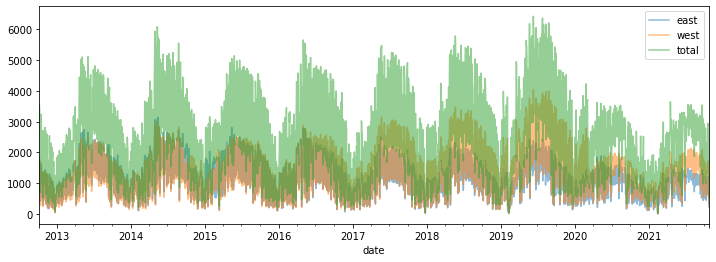

In [26]:
#df.groupby(df.index.date).sum().plot(alpha=0.5, figsize=(12, 4))
df.resample('1D').sum().plot(alpha=0.5, figsize=(12, 4))

## Задание

- Визуализировать среднегодовые потоки велосипедистов

<AxesSubplot:xlabel='date'>

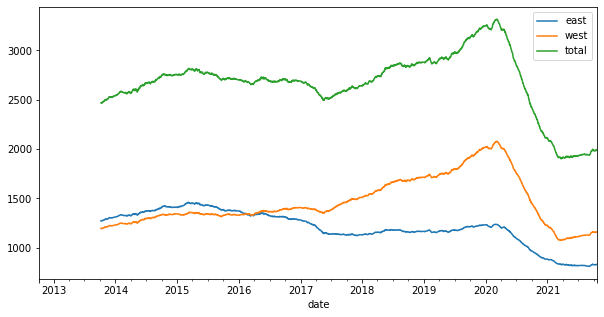

In [30]:
df.resample('1D').sum().rolling(365).mean().plot(figsize=(10, 5))

## Задание

- Визуализировать изменение среднего количества велосипедистов в течение дня

<AxesSubplot:xlabel='date'>

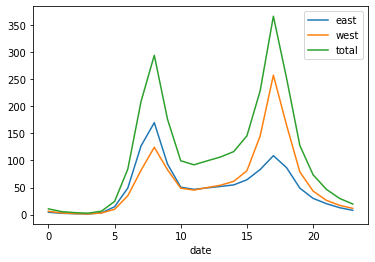

In [31]:
df.groupby(df.index.hour).mean().plot()

## Задание

- Построить сводную таблицу для среднего числа велосипедистов: строки - время, столбцы - дата

In [33]:
table = df.pivot_table(index=df.index.hour,
                       columns=df.index.date,
                       values='total')
table.head()

,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,2012-10-13,2012-10-14,2012-10-15,2012-10-16,2012-10-17,...,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24
date,,,,,,,,,,,,,,,,,,,,,
0,9.0,12.0,15.0,21.0,17.0,18.0,6.0,7.0,10.0,22.0,...,7.0,24.0,20.0,3.0,7.0,13.0,7.0,2.0,11.0,11.0
1,4.0,3.0,3.0,10.0,13.0,11.0,9.0,3.0,5.0,6.0,...,2.0,11.0,7.0,0.0,2.0,1.0,0.0,2.0,12.0,7.0
2,5.0,4.0,3.0,13.0,5.0,16.0,8.0,5.0,3.0,5.0,...,0.0,13.0,3.0,2.0,3.0,3.0,0.0,1.0,12.0,3.0
3,5.0,8.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,...,1.0,1.0,1.0,0.0,2.0,2.0,7.0,2.0,8.0,4.0
4,5.0,9.0,5.0,12.0,5.0,3.0,5.0,6.0,5.0,7.0,...,3.0,1.0,2.0,4.0,8.0,0.0,9.0,3.0,2.0,4.0


## Задание 

- Применить метод Principal Component Analysis (PCA, анализ главных компонент) для снижения размерности до двумерного пространства (`from sklearn.decomposition import PCA`)
- Визуализировать полученное множество точек

In [34]:
from sklearn.decomposition import PCA

In [37]:
arr = table.fillna(0).T.to_numpy()
arr.shape

(3304, 24)

In [39]:
arr2d = PCA(2).fit_transform(arr)

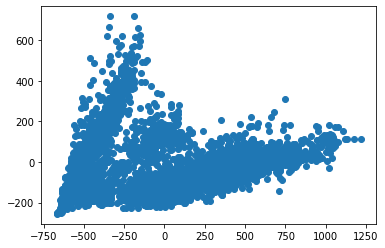

In [40]:
plt.scatter(arr2d[:,0], arr2d[:,1]);

## Задание 

- Предположив, что распределение является суммой нормальных распределений, кластеризовать данные (`from sklearn.mixture import GaussianMixture`)
- Визуализировать множество точек используя номер кластера для придания цвета точкам

In [49]:
from sklearn.mixture import GaussianMixture
labels = GaussianMixture(2).fit_predict(arr)
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

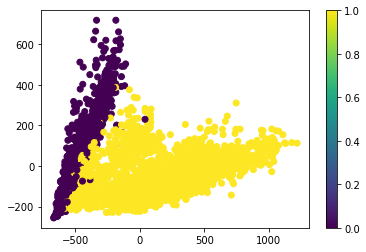

In [50]:
plt.scatter(arr2d[:,0], arr2d[:,1], c=labels);
plt.colorbar();

## Задание 

- Проверить, какие дни недель свойственны какому кластеру

In [54]:
dates = pd.to_datetime(table.columns)
wd = dates.weekday

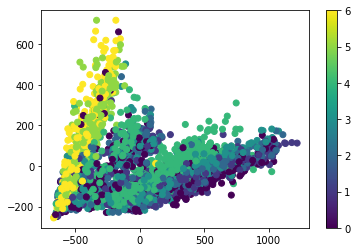

In [55]:
plt.scatter(arr2d[:,0], arr2d[:,1], c=wd);
plt.colorbar();

## Задание 

- Выявить даты событий, когда день недели не соответствовал кластеру
- Какие из дат Вам знакомы?

In [59]:
mask = (wd < 5) & (labels == 0)
dates[mask]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29', '2013-12-20', '2013-12-25',
               '2014-01-01', '2014-04-23', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2018-01-01',
               '2018-05-28', '2018-07-04', '2018-09-03', '2018-11-22',
               '2018-11-23', '2018-12-24', '2018-12-25', '2019-01-01',
               '2019-02-04', '2019-02-05', '2019-02-08', '2019-02-11',
      

<AxesSubplot:xlabel='date'>

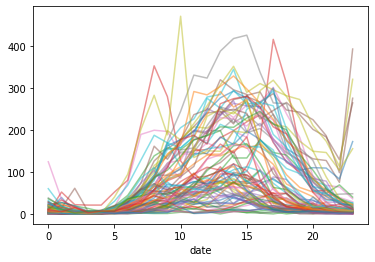

In [61]:
table.T[mask].T.plot(legend=False, alpha=0.5)